# Predicting fetal health using machine learning

This notebook uses Python-based machine learning tools to build a machine learning model capable of predicting whether or not a fetus' health is normal, suspect, or pathological based on their medical attributes.

I am going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can I determine whether their fetus' health is: Normal,
Suspect, 
or Pathological

## 2. Data

The data came from a Kaggle dataset  repository.https://www.kaggle.com/andrewmvd/fetal-health-classification


21 Attributes

baseline value - Baseline Fetal Heart Rate

accelerations - Number of accelerations per second

fetal_movement - Number of fetal movements per second

uterine_contractions - Number of uterine contractions per second

light_decelerations - Number of LDs per second

severe_decelerations - Number of SDs per second

prolongued_decelerations - Number of PDs per second

abnormal_short_term_variability - Percentage of time with abnormal short term variability

mean_value_of_short_term_variability - Mean value of short term variability

percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long term variability

mean_value_of_long_term_variability - Mean value of long term variability

histogram_width - Width of the histogram made using all values from a record

histogram_min - Histogram minimum value

histogram_max - Histogram maximum value

histogram_number_of_peaks - Number of peaks in the exam histogram

histogram_number_of_zeroes - Number of zeroes in the exam histogram

histogram_mode - Hist mode

histogram_mean - Hist mean

histogram_median - Hist Median

histogram_variance - Hist variance

histogram_tendency - Histogram trend

## 3. Evaluation

> Attempt to reach 95% accuracy at predicting whether or not a patient's fetus' health is Normal,
Suspect, or
Pathological

## 4. Features

I include information about each of the features in the data.


## Preparing the tools
I will use Pandas, Seaborn, Matplotlib and NumPy for data analysis and manipulation



In [65]:
#Import all the tools
#Regular Exploritory Data Analysis and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

#to show plots within notebook
%matplotlib inline 

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [5]:
df = pd.read_csv("fetal_health.csv")
df.shape

(2126, 22)

## Data Exploration (EDA - Exploratory Data Analysis)

The goal is to learn more about the data
1. What question(s) am I trying to solve
2. What kind of data do I have and how do I treat different types?
3. What's missing from the data and how do I deal with it?
4. What are the outliers and how does it affect the data?
5. How can you add, change or remove features to get more out of your data?

In [6]:
df.head()


,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [7]:
df.tail()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140,0.000,0.000,0.007,0.0,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.0,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.0,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.0,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2
2125,142,0.002,0.002,0.008,0.0,0.0,0.0,74,0.4,36,...,117,159,2,1,145,143,145,1,0,1


In [8]:
#how many of each class there are
df["fetal_health"].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

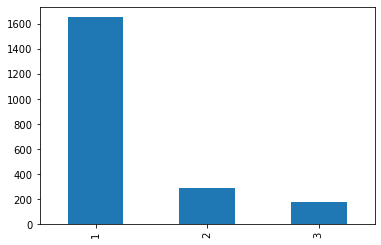

In [9]:
df["fetal_health"].value_counts().plot(kind="bar");

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [11]:
#missing values
df.isna().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [12]:
df.describe()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [13]:
df.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

In [14]:
#Compare fetal health column with accelerations column
pd.crosstab(df.accelerations, df.fetal_health);

Text(0.5, 0, 'accelerations per second')

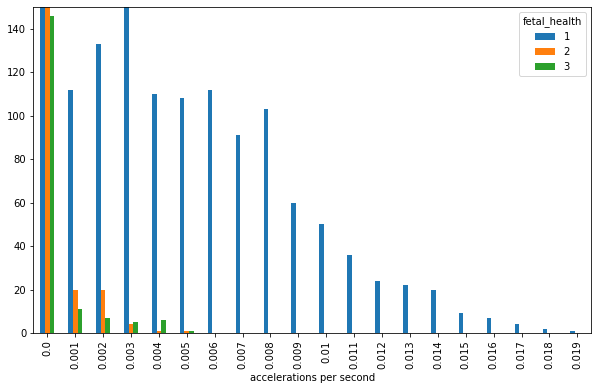

In [15]:
pd.crosstab(df.accelerations, df.fetal_health).plot(kind = "bar", figsize = (10,6), ylim=(0,150))
plt.xlabel("accelerations per second")

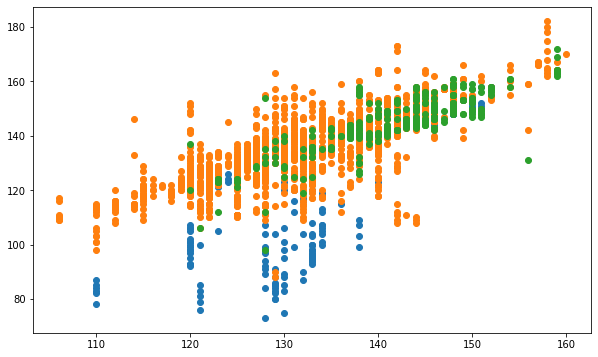

In [16]:
plt.figure (figsize = (10,6))
plt.scatter(df.baseline_value[df.fetal_health==3], df.histogram_mean[df.fetal_health==3])
plt.scatter(df.baseline_value[df.fetal_health==1], df.histogram_mean[df.fetal_health==1])
plt.scatter(df.baseline_value[df.fetal_health==2], df.histogram_mean[df.fetal_health==2])

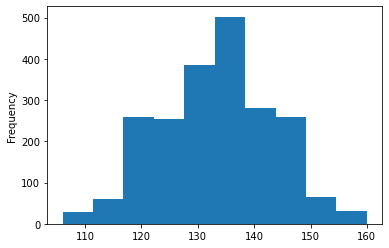

In [17]:
df.baseline_value.plot.hist();

In [18]:
### fetal health per histogram number of peaks

In [19]:
pd.crosstab(df.abnormal_short_term_variability, df.fetal_health)

fetal_health,1,2,3
abnormal_short_term_variability,,,
12,2,0,0
13,7,0,0
14,4,0,0
15,4,0,0
16,12,0,0
...,...,...,...
82,0,0,2
83,1,0,3
84,0,0,6


## df.corr()

(22.5, -0.5)

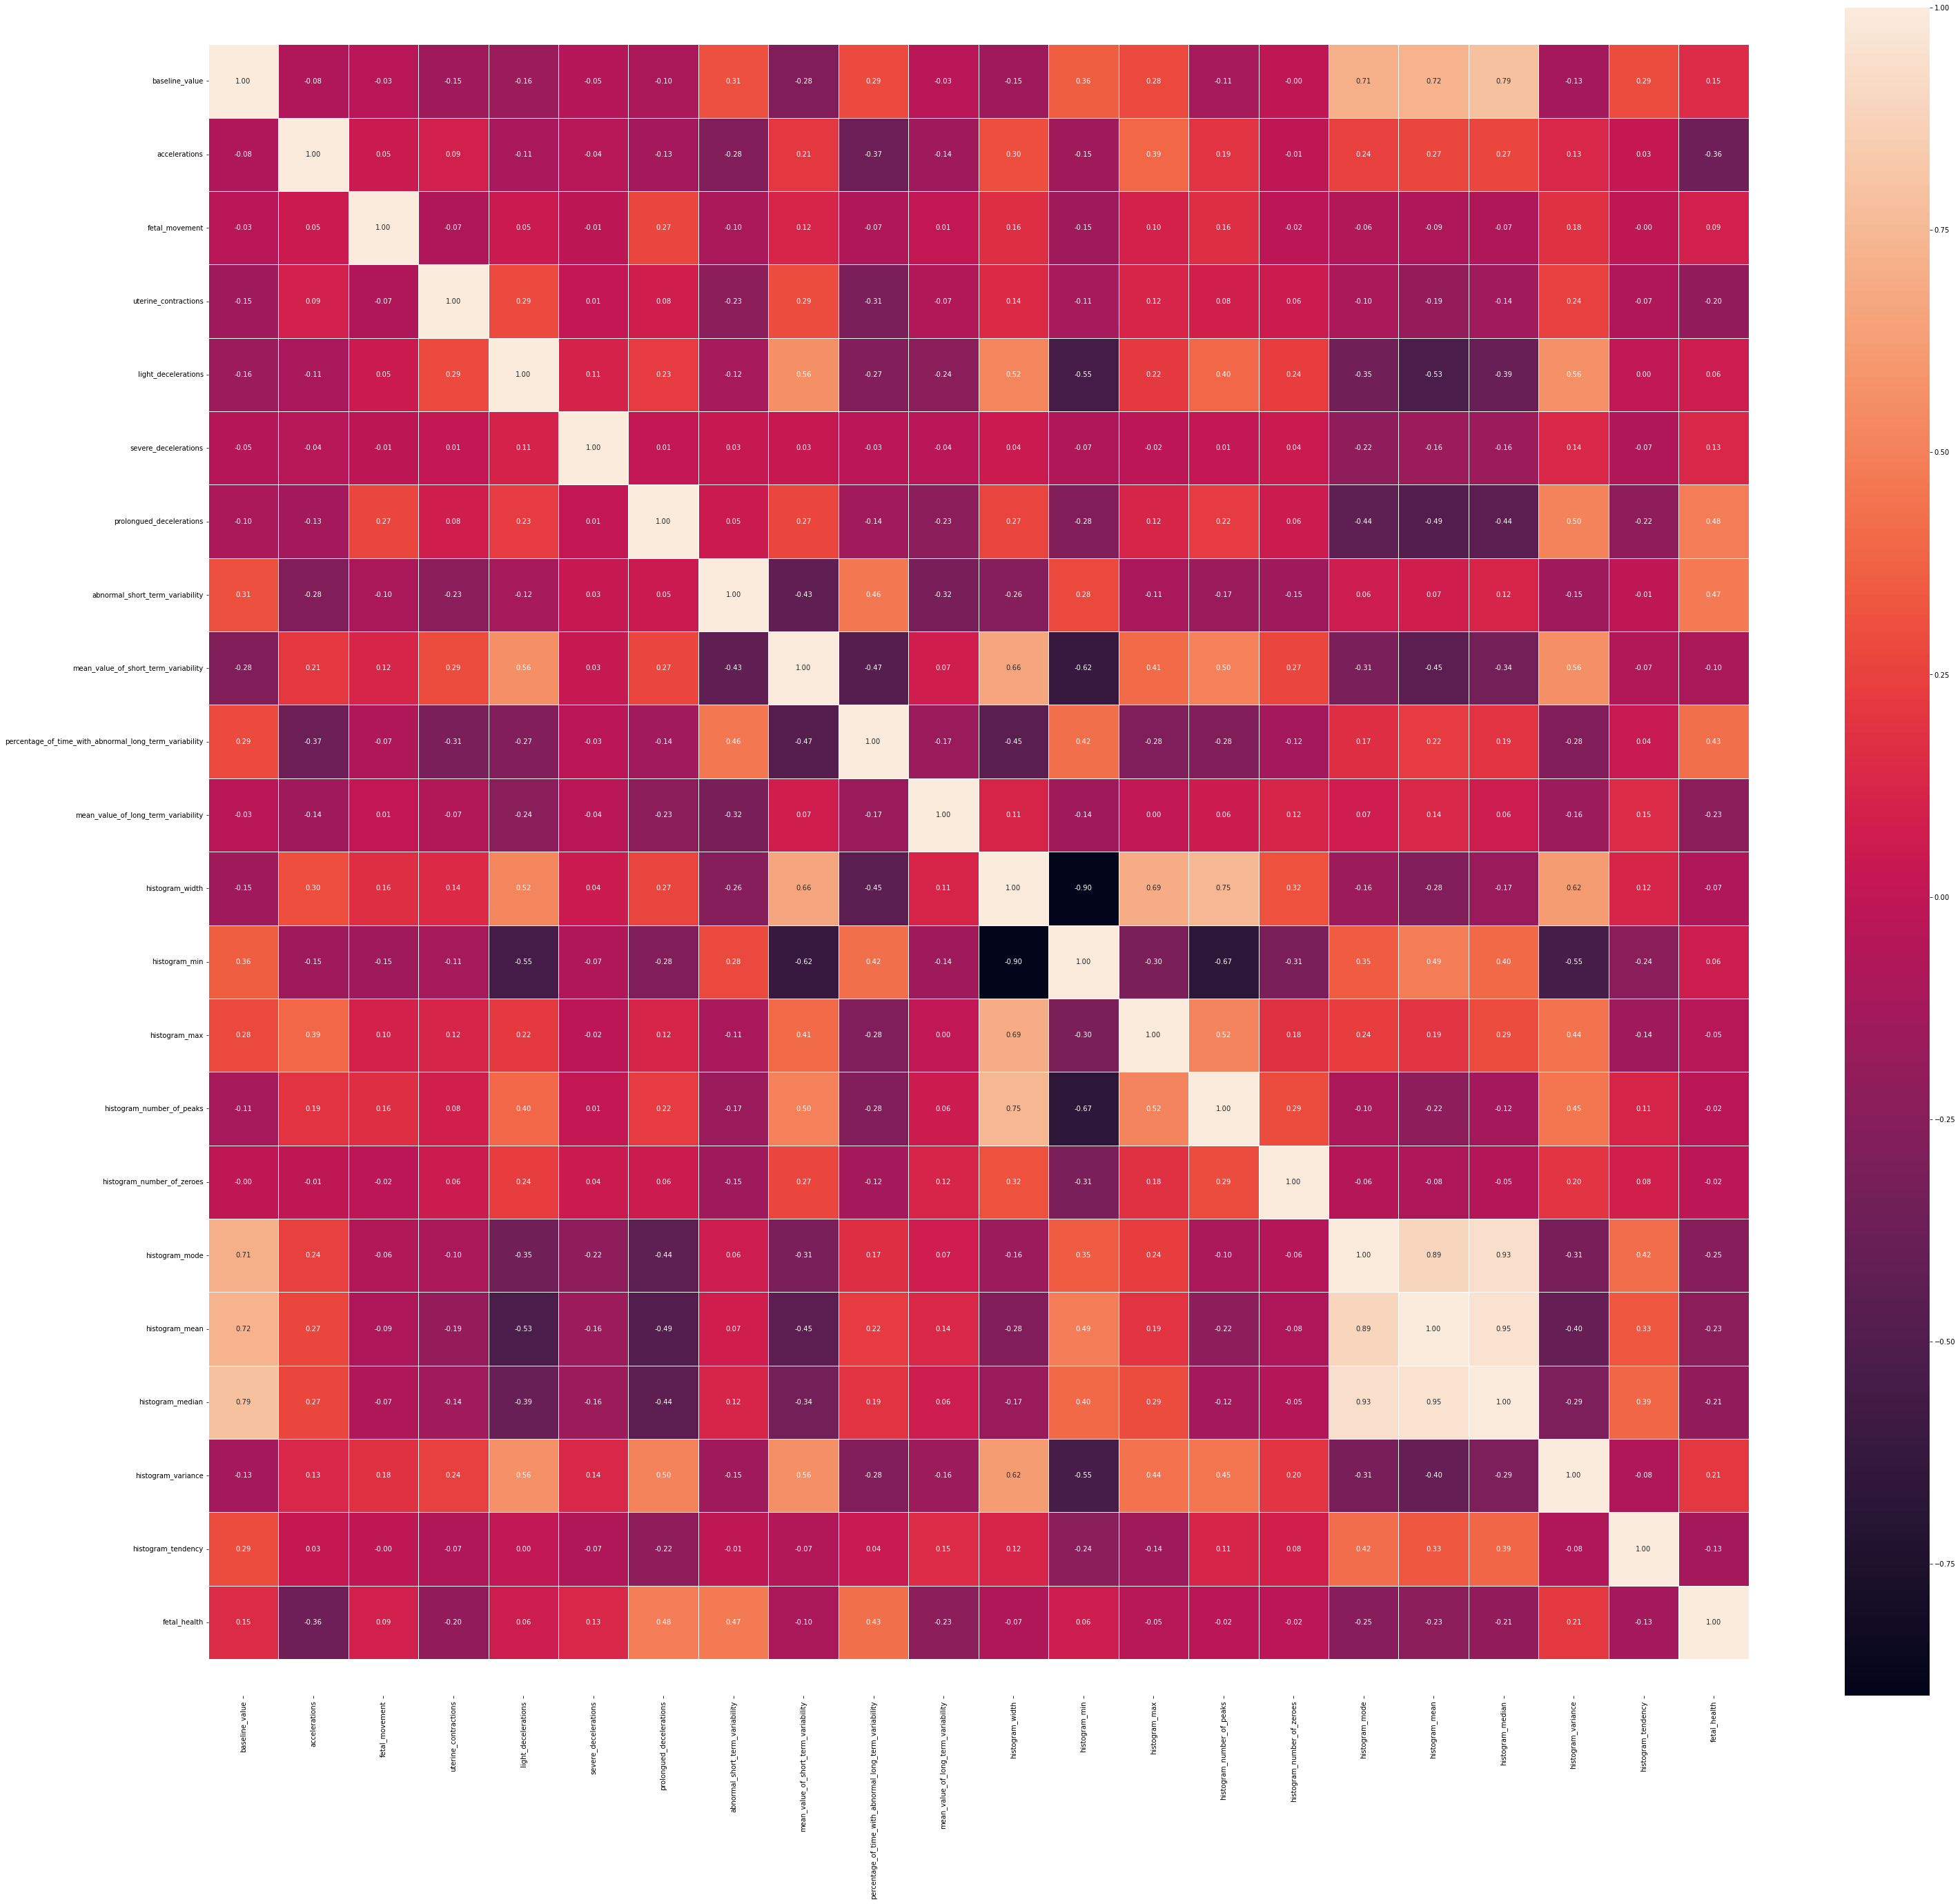

In [20]:
#correlation matrix heat map
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize = (50,45))
zx = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


Text(0.5, 0, 'prolongued decelerations')

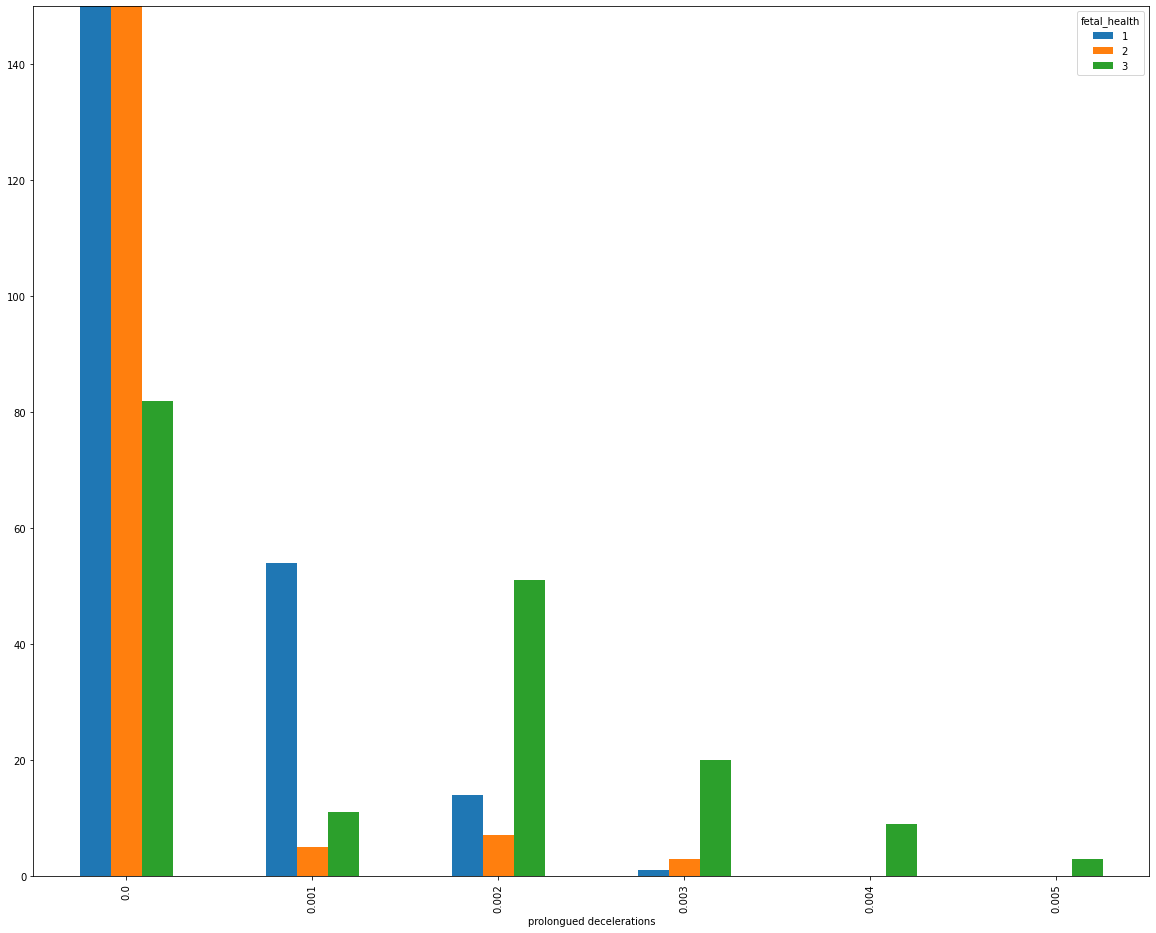

In [21]:
pd.crosstab(df.prolongued_decelerations, df.fetal_health).plot(kind = "bar", figsize = (20,16), ylim=(0,150))
plt.xlabel("prolongued decelerations")

Text(0.5, 0, 'abnormal short term variability')

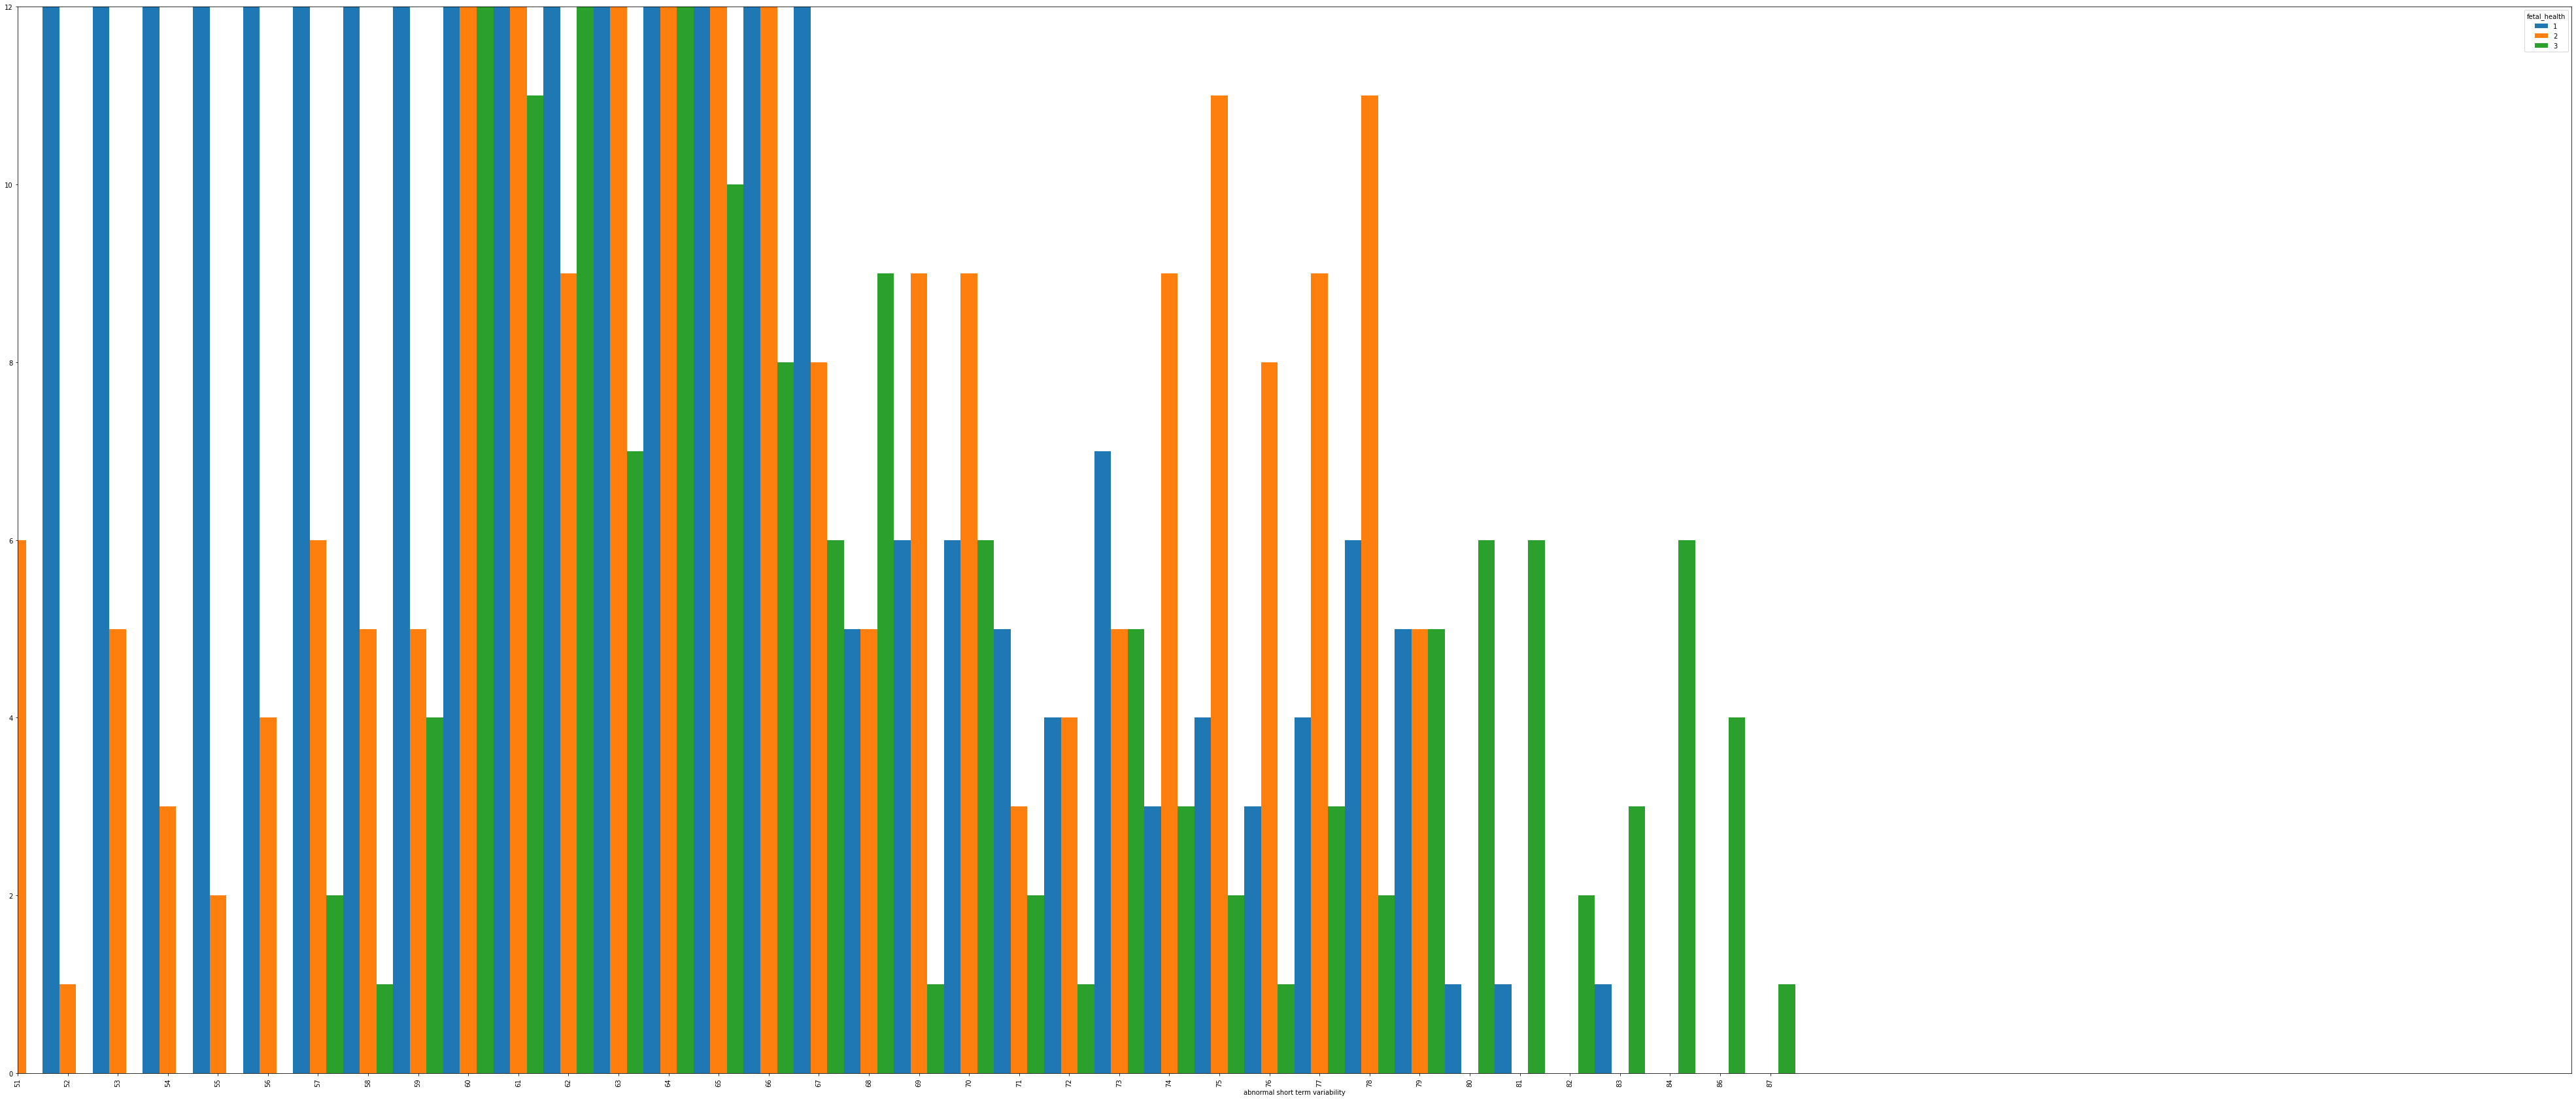

In [22]:
pd.crosstab(df.abnormal_short_term_variability, df.fetal_health).plot(kind = "bar", figsize = (70,30), ylim=(0,12), width =(1));
plt.xlim(39,90)
plt.xlabel("abnormal short term variability")

## 5. Modeling

In [23]:
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [98]:
#Split data into X and Y
X = df.drop("fetal_health", axis = 1)
y = df["fetal_health"]

In [86]:
#split data into train and test sets
np.random.seed(50)

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
y_train, len(y_train)

(105     1
 760     1
 1566    1
 666     2
 925     1
        ..
 132     1
 2014    1
 1931    1
 1504    1
 1712    1
 Name: fetal_health, Length: 1700, dtype: int64,
 1700)

Build a machine learning model.

Train to find patterns on training set.

Test and use patterns on test set.

3 different machine learning models:
1. Logistic Regression.
2. K-Nearest Neighbors Classifier.
3. Random Forest Classifier.

In [28]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and socre models
def fit_score (models, x_train, x_test, y_train, y_test):
    """ 
    Fits and evaluates machine learning models.
    models: dictionary of different machine learning models
    x_train: training data
    x_test: testing data
    y_train: training labels
    y_test: test labels
    """
    
    #set seed
    np.random.seed(50)
    
    #list to make a dictionary to keep model scores
    model_scores = {}
    #loop though models
    for name, model in models.items():
        #fit model to data
        model.fit(x_train, y_train)
        #evaluate model and append score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [29]:
model_scores = fit_score(models = models, 
                        x_train = x_train,
                        x_test = x_test,
                        y_train = y_train,
                        y_test = y_test)
model_scores

C:\Users\Darya\Desktop\classification_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8826291079812206,
 'KNN': 0.9131455399061033,
 'Random Forest': 0.9460093896713615}

### Model Comparison

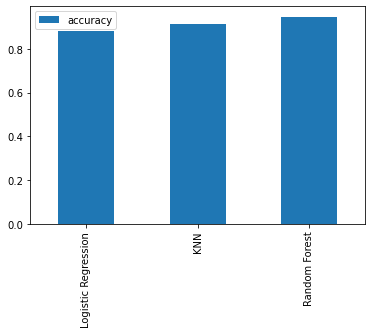

In [30]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

Next I will look at the following:

*Hyperparameter tuning

*Feature importance

*Confusion matrix

*Cross validation

*Precision

*Recall

*F1 Score

*Classification report

*ROC curve

*Area under the curve (AUC)

### Hyperparameter tuning


In [31]:
#tuning KNN
train_scores = []
test_scores = []

#list of different values for n_neighbors
neighbors = range (1, 25)

#set up instance
knn = KNeighborsClassifier()

#loop through n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #fit the algorithm
    knn.fit(x_train, y_train)
    
    #update train list
    train_scores.append(knn.score(x_train, y_train))
    
    #update test scores list
    test_scores.append(knn.score(x_test, y_test))
    


In [32]:
train_scores

[0.9988235294117647,
 0.9358823529411765,
 0.9370588235294117,
 0.9170588235294118,
 0.9205882352941176,
 0.908235294117647,
 0.91,
 0.9047058823529411,
 0.9035294117647059,
 0.8976470588235295,
 0.9,
 0.89,
 0.8935294117647059,
 0.8870588235294118,
 0.8870588235294118,
 0.8829411764705882,
 0.8870588235294118,
 0.8835294117647059,
 0.8852941176470588,
 0.8858823529411765,
 0.8858823529411765,
 0.8817647058823529,
 0.8823529411764706,
 0.8811764705882353]

In [33]:
test_scores

[0.9178403755868545,
 0.92018779342723,
 0.9178403755868545,
 0.9154929577464789,
 0.9131455399061033,
 0.9131455399061033,
 0.9225352112676056,
 0.9014084507042254,
 0.8943661971830986,
 0.8990610328638498,
 0.8990610328638498,
 0.8943661971830986,
 0.8967136150234741,
 0.8967136150234741,
 0.8943661971830986,
 0.8943661971830986,
 0.8943661971830986,
 0.8967136150234741,
 0.8873239436619719,
 0.8943661971830986,
 0.8826291079812206,
 0.892018779342723,
 0.8896713615023474,
 0.8943661971830986]

Maximum KNN score on the test data: 92.25%


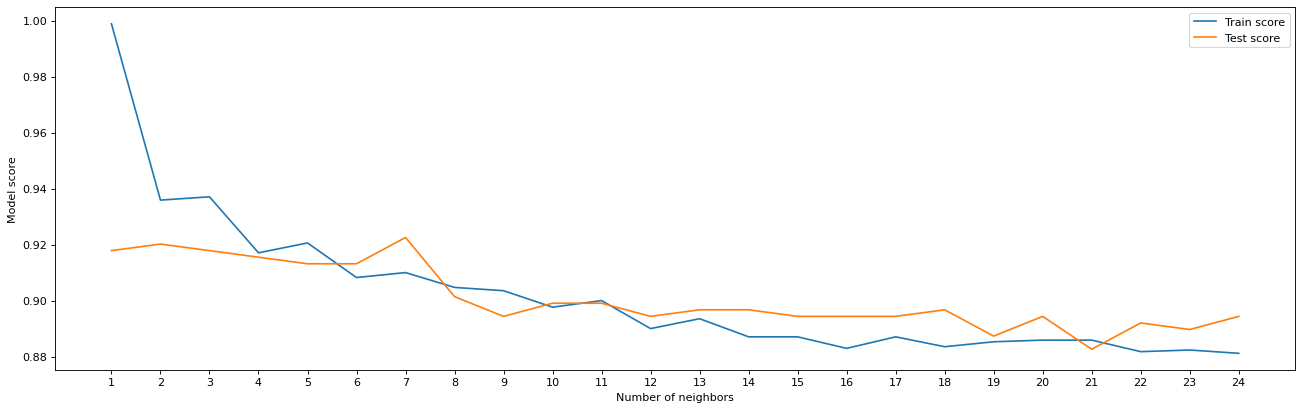

In [34]:

from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1, 25,  1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores) *100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

Tune:

*LogisticRegression()

*RandomForestClassifier()

...using RandomizedSearchCV

In [35]:
# create hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}
#create hyperparameter grid for random forest
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [36]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [37]:
# tune logistic regression

np.random.seed(50)

#set up random hyperparameter search for log reg
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 10,
                               n_iter = 20,
                               verbose = True)

# fit random hyperparameter search model for logistic reg

rs_log_reg.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [39]:
rs_log_reg.score(x_test, y_test)

0.9178403755868545

Tune Random forest classifier

In [40]:
#set up random seed
np.random.seed(45)

#set up random hyperparameter search for forest

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv = 5,
                          n_iter = 100,
                          verbose = True)

#fit random hyperparameter search model for random forest
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

##hyperparameter tuning with gridsearchcv

RandomForest model provides best scores, so I will try to improve it again using GridSearchCV


In [41]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': None}

In [42]:
#hyper parameters using best parameters
rs_rf_grid = {"n_estimators":np.arange(10, 1000, 50),
          "max_depth": [None],
          "min_samples_split":[8, 10, 12],
          "min_samples_leaf": [3, 4, 5]}
#set up grid for random forest

gs_rs_rf = GridSearchCV(RandomForestClassifier(),
                       param_grid = rs_rf_grid,
                       cv = 3,
                       verbose = True)

# fit grid hyperparameter search model
gs_rs_rf.fit(x_train, y_train)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [43]:
gs_rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 60}

In [44]:
gs_rs_rf.score(x_test, y_test)

0.9389671361502347

##Evaluate tuned machine learning classifier

*ROC curve and AUC score

*Confusion matrix

*Classification report

*Precision

*Recall

*F1 - score

using cross validation




In [46]:
#Make predictions with tuned model
y_prediction = gs_rs_rf.predict(x_test)

In [48]:
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 1, 2, 1, 2, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3,
       3, 3, 1, 2, 3, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1,

In [49]:
y_test

222     1
1743    1
1632    1
1462    2
1847    1
       ..
663     2
1251    1
776     2
1029    1
1095    1
Name: fetal_health, Length: 426, dtype: int64

In [50]:
#confusion matrix

print(confusion_matrix(y_test, y_prediction))

[[321   8   4]
 [ 13  42   0]
 [  0   1  37]]


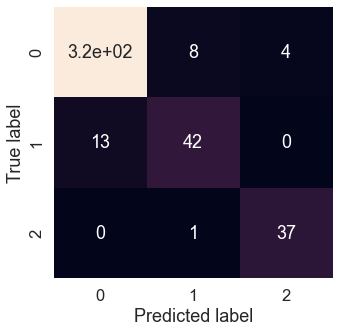

In [51]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_prediction):
    """
    confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_prediction),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_prediction)

Classification report as well as cross-validated precision, recall and F1 score

In [52]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       333
           2       0.82      0.76      0.79        55
           3       0.90      0.97      0.94        38

    accuracy                           0.94       426
   macro avg       0.90      0.90      0.90       426
weighted avg       0.94      0.94      0.94       426



### calc evaluation metrics using cross validation
Calculate precision, recall, F1 score using cross validation using 'cross_val_score'

In [53]:
gs_rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 60}

In [54]:
# create a new classifier with best parameters
clf = RandomForestClassifier(
                            min_samples_leaf = 3,
                            min_samples_split = 8,
                            n_estimators = 560)

In [66]:
#saving model to disk
pickle.dump(clf, open('model.pkl', 'wb'))

In [100]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = "balanced_accuracy")

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.738701705589923

In [101]:
#Cross-validated precision
cv_precision = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = "precision_weighted")
cv_precision = np.mean(cv_precision)

cv_precision

0.8809319216086194

In [102]:
#Cross-validated recall
cv_recall = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = "recall_weighted")
cv_recall = np.mean(cv_recall)

cv_recall

0.8725335542667771

In [103]:
#Cross-validated F1 score
cv_f1 = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = "f1_macro")
cv_f1 = np.mean(cv_f1)

cv_f1

0.7610893269591024

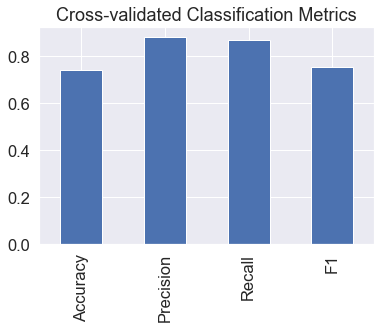

In [60]:
#visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title = "Cross-validated Classification Metrics",
                     legend = False);

### Feature Importance
Which features contributed most to the outcomes and how

In [104]:
clf = RandomForestClassifier(min_samples_leaf = 3,
                            min_samples_split = 8,
                            n_estimators = 560)
clf.fit(x_train, y_train);

In [105]:
clf.feature_importances_

array([0.03397976, 0.05128604, 0.01794534, 0.03684711, 0.00597803,
       0.00057261, 0.04767047, 0.13028709, 0.13908529, 0.12907185,
       0.04170361, 0.03299115, 0.03671058, 0.02549963, 0.01548144,
       0.0022982 , 0.06203952, 0.09694432, 0.05348545, 0.03532961,
       0.00479289])

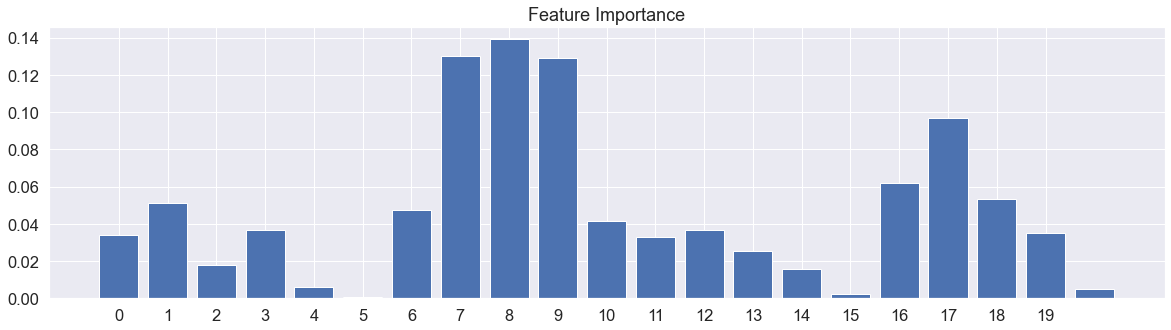

In [115]:
plt.figure(figsize=(20,5))
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.xticks(np.arange(0, 20,  1))
plt.title("Feature Importance")
plt.show()

In [113]:
x_train


,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
105,125,0.004,0.029,0.003,0.004,0.0,0.000,22,2.8,0,...,128,56,184,5,1,125,123,126,16,0
760,129,0.003,0.005,0.000,0.000,0.0,0.000,61,0.4,7,...,67,111,178,4,0,143,138,140,7,0
1566,145,0.003,0.000,0.006,0.000,0.0,0.000,48,0.7,2,...,38,133,171,2,0,160,159,160,2,1
666,138,0.000,0.005,0.003,0.000,0.0,0.000,62,0.5,9,...,27,121,148,1,0,142,140,142,1,1
925,122,0.002,0.000,0.005,0.002,0.0,0.000,23,1.7,3,...,73,84,157,3,0,126,121,122,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,158,0.000,0.000,0.000,0.000,0.0,0.000,57,0.5,58,...,11,159,170,0,0,165,165,166,0,0
2014,125,0.000,0.000,0.009,0.006,0.0,0.001,65,1.1,0,...,82,64,146,5,1,116,111,116,9,0
1931,133,0.000,0.001,0.009,0.005,0.0,0.000,58,2.6,0,...,66,83,149,4,0,135,123,132,21,1
1504,130,0.006,0.000,0.006,0.000,0.0,0.000,38,1.0,0,...,53,102,155,6,1,136,135,137,4,0


In [117]:
df.head()

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,...,62,126,2,0,120,137,121,73,1,2
1,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,...,68,198,6,1,141,136,140,12,0,1
2,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,...,68,198,5,1,141,135,138,13,0,1
3,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,...,53,170,11,0,137,134,137,13,1,1
4,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,...,53,170,9,0,137,136,138,11,1,1
